# Supervised Machine Learning: Regression - Project

## Course 2 (IBM Machine Learning Professional Certificate)

This notebook is based on the structure/ideas which are part of the Lab Demos of the Regression course by IBM ((c) 2020 IBM Corporation) as well as on the concepts taught in the class. Moreover, this course is part of the IBM Machine Learning Professional Certificate, which can be found here: https://www.coursera.org/professional-certificates/ibm-machine-learning

By: Berni Stitic, November 2021

## Index 

1. Loading the data set
2. Train test splits (for simple linear regression baseline)
3. Simple linear regression model (baseline)
4. Polynomial features (regression with polynomial features)
5. Lasso regression with polynomial features
6. Ridge regression with polynomial features
7. Residuals (example)

## 1. Loading the data set

The chosen data set for this project is the Ames Hosing data set. It is described by the author, Dean De Cock, here: www.amstat.org/publications/jse/v19n3/decock.pdf 

Reference (as it appears in the paper):

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

Also, the version that is loaded here has a subset of the features. This data subset was preprocessed in the first project for the IBM Machine Learning Professional Certificate, specifically the project for the first course (Exploratory Data Analysis by IBM). More information can be found in the notebook "Project_EDA.ipynb" and the associated report.

In [1]:
# The following lines of code are taken from the Feature Engineering lab demo (EDA course by IBM)
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [187]:
df = pd.read_csv("./data/selected_variables_clean.csv")

#### Sanity checks (general information and skewness)  

This part was taken from the notebook "Project_EDA.ipynb". The objective is to verify the results of the data.

In [188]:
df.head()

,Fireplaces,SalePrice,Gr Liv Area,Lot Area,Garage Cars,Total Bsmt SF
0,1.098612,12.278398,7.412764,10.366309,2.0,1080.0
1,0.000000,11.561725,6.799056,9.360741,1.0,882.0
2,0.000000,12.055256,7.192934,9.565775,1.0,1329.0
3,1.098612,12.404928,7.654917,9.320181,2.0,2110.0
4,0.693147,12.154258,7.396335,9.534668,2.0,928.0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fireplaces     2925 non-null   float64
 1   SalePrice      2925 non-null   float64
 2   Gr Liv Area    2925 non-null   float64
 3   Lot Area       2925 non-null   float64
 4   Garage Cars    2925 non-null   float64
 5   Total Bsmt SF  2925 non-null   float64
dtypes: float64(6)
memory usage: 137.2 KB


In [190]:
skewed_variables_log = df[df.columns.tolist()].skew()
skewed_variables_frame_log = skewed_variables_log.sort_values(ascending=False).to_frame().rename(columns={0:'Skew'}) 
skewed_variables_frame_log

,Skew
Total Bsmt SF,0.395191
Fireplaces,0.235802
SalePrice,-0.041927
Gr Liv Area,-0.059228
Garage Cars,-0.221062
Lot Area,-0.534108


In [191]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fireplaces,2925.0,0.389310,0.394534,0.000000,0.000000,0.693147,0.693147,1.609438
SalePrice,2925.0,12.019887,0.406013,9.456419,11.771444,11.982935,12.271397,13.345509
Gr Liv Area,2925.0,7.258784,0.320753,5.814131,7.027315,7.273786,7.462215,8.248267
Lot Area,2925.0,9.090148,0.508309,7.170888,8.914492,9.151545,9.351493,12.279537
Garage Cars,2925.0,1.764444,0.760405,0.000000,1.000000,2.000000,2.000000,5.000000
Total Bsmt SF,2925.0,1046.494359,421.482215,0.000000,792.000000,989.000000,1299.000000,3206.000000


#### Pair plot

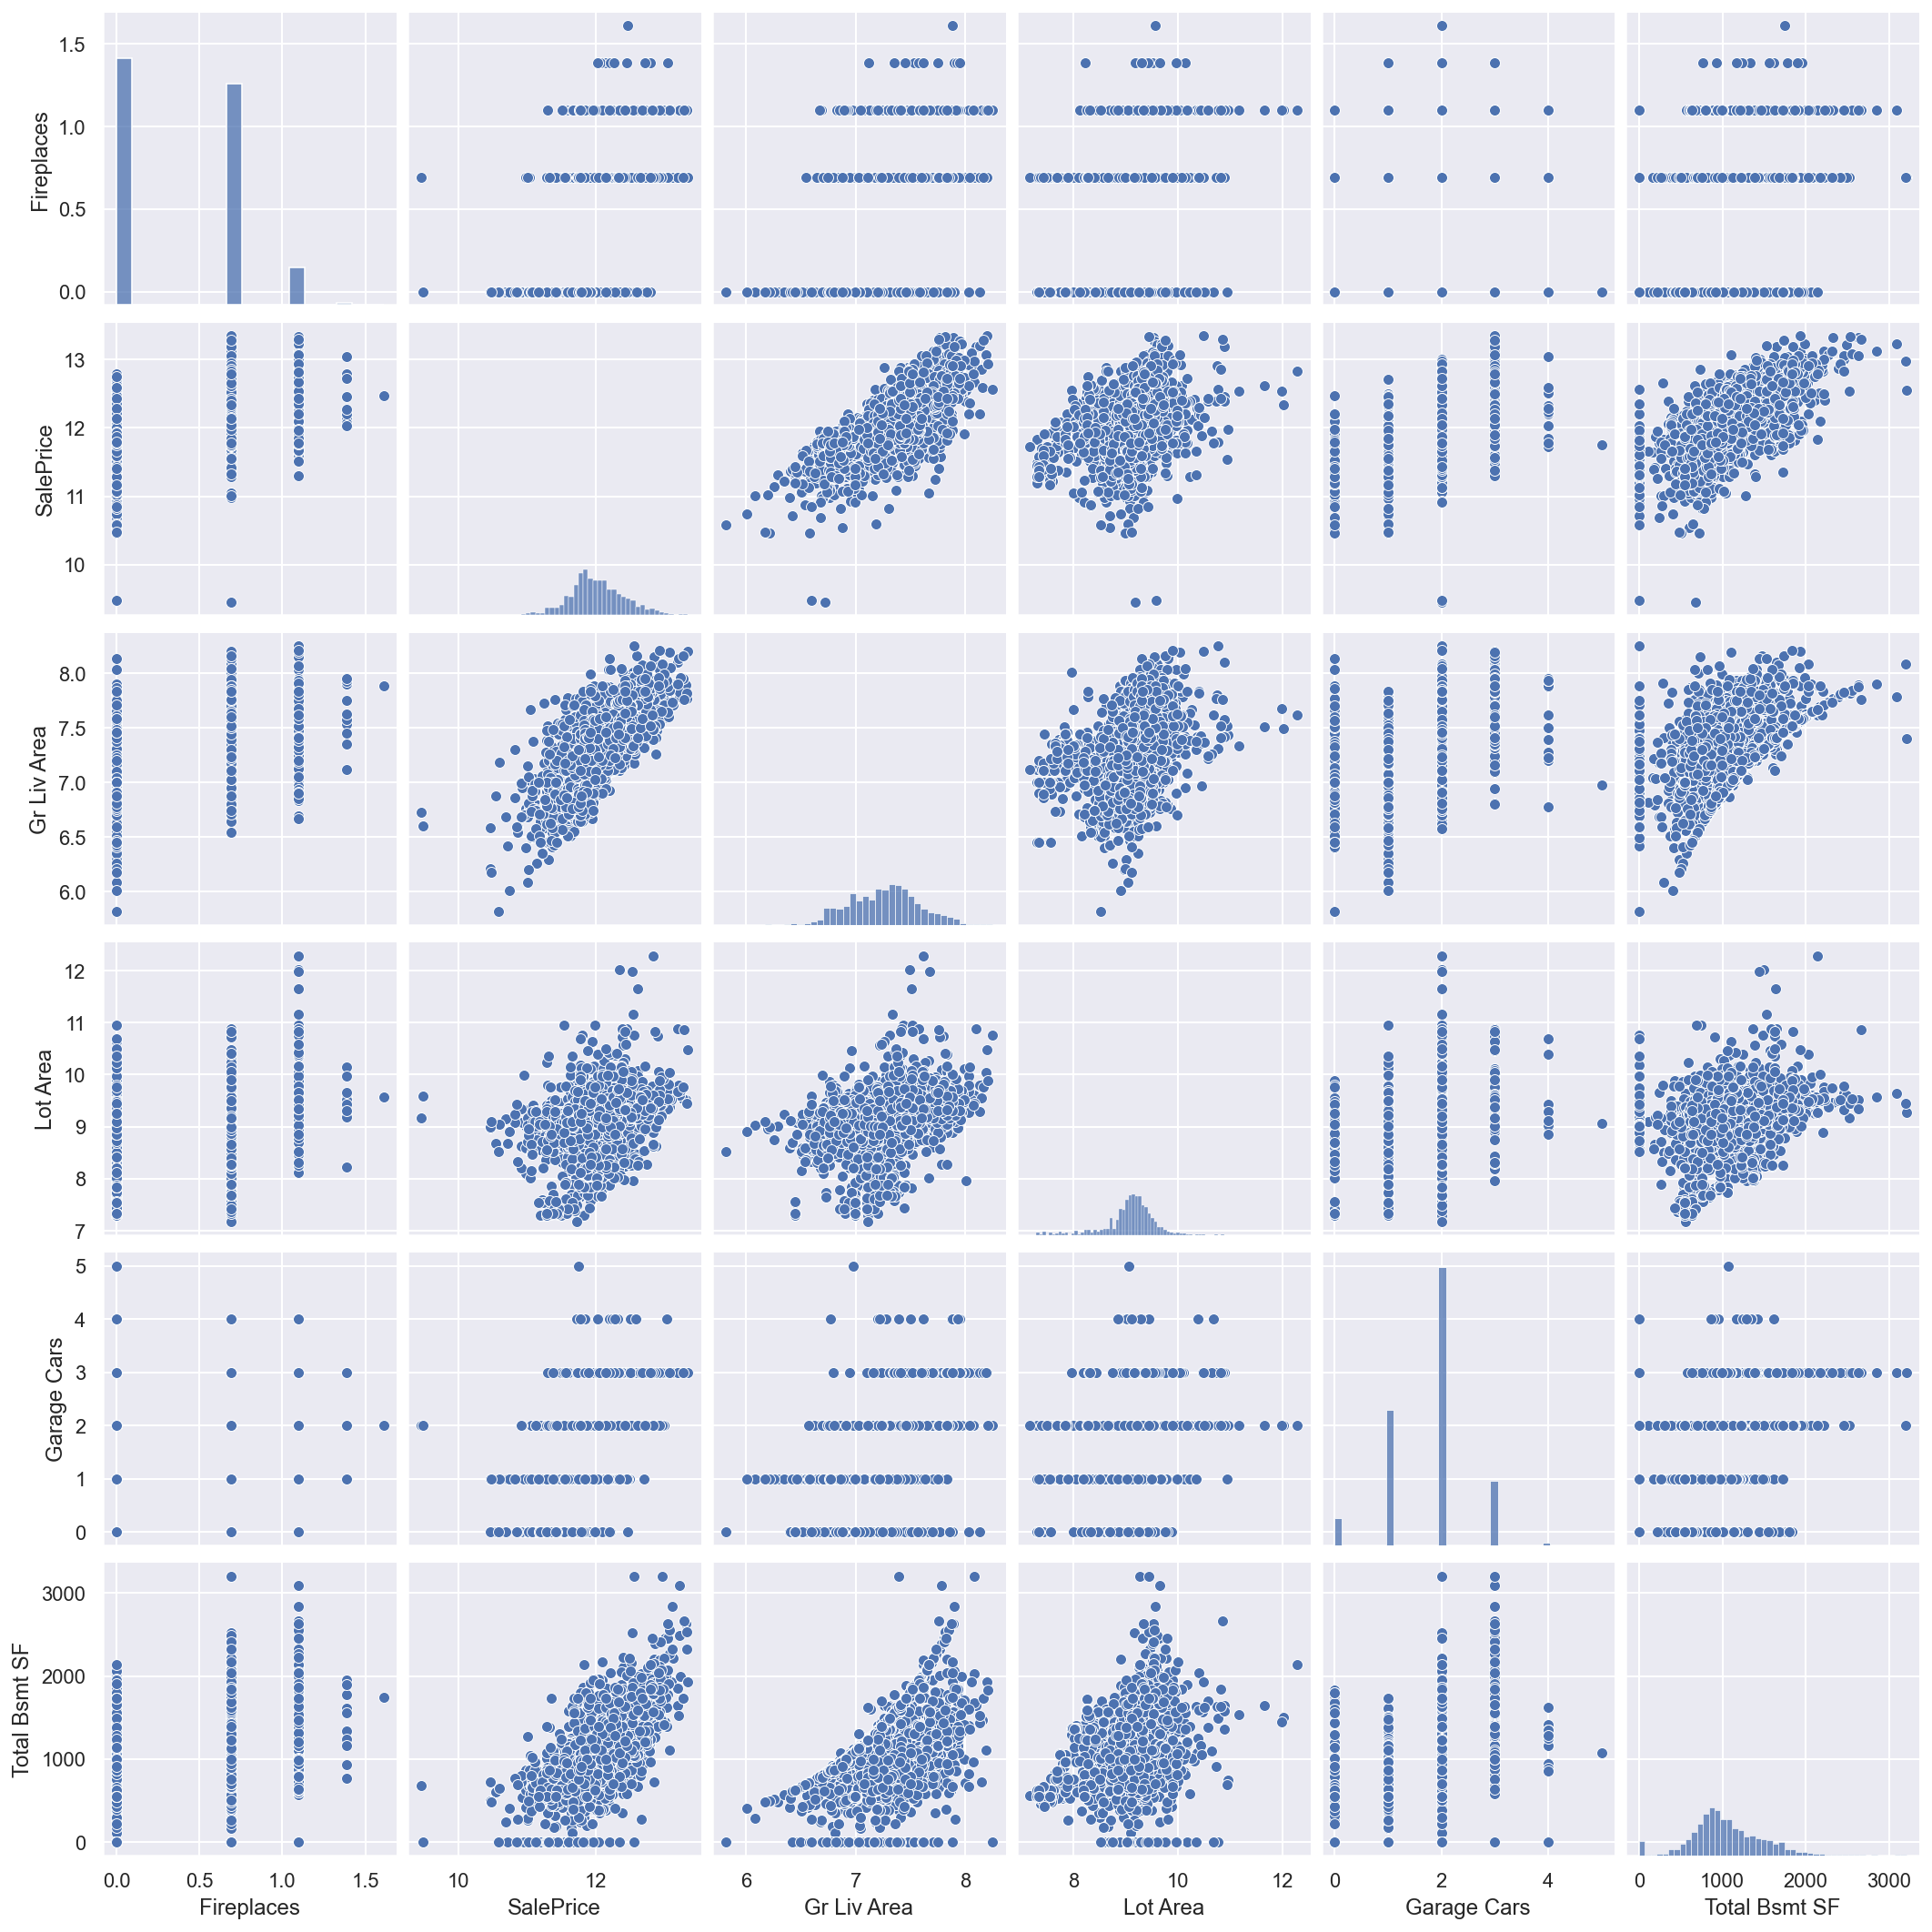

In [7]:
sns.pairplot(df)

# 2. Train test splits (for simple linear regression baseline)

#### Separate features from the target (X and y variables) 

In [192]:
X_data = df.drop('SalePrice',axis=1)
y_data = df['SalePrice']

#### Sanity checks

In [193]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fireplaces     2925 non-null   float64
 1   Gr Liv Area    2925 non-null   float64
 2   Lot Area       2925 non-null   float64
 3   Garage Cars    2925 non-null   float64
 4   Total Bsmt SF  2925 non-null   float64
dtypes: float64(5)
memory usage: 114.4 KB


In [194]:
y_data

0       12.278398
1       11.561725
2       12.055256
3       12.404928
4       12.154258
          ...    
2920    11.867104
2921    11.782960
2922    11.790565
2923    12.043560
2924    12.144203
Name: SalePrice, Length: 2925, dtype: float64

#### Obtain the training and test sets 

In [195]:
# Import the required libraries; this code was taken from the Transforming Target Lab Demo of the course
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [115]:
# The following code was adapted from the Transforming Target Lab Demo of the course
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

#### Check the shapes

In [116]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (2047, 5)
Shape of y_train:  (2047,)
Shape of X_test:  (878, 5)
Shape of y_test:  (878,)


# 3. Simple linear regression model (baseline)

As required for the project, first a simple linear regression model will be used as a baseline. Next steps regarding the improvement of the models as well as further processing of the data will be addressed at the end of the project (in the report).

#### .fit() method on the training data 

In [117]:
# Instantiate a linear regression estimator, and fit it to the training data
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

#### Get the predictions

In [118]:
y_pred_lr = lr.predict(X_test)

In [119]:
y_pred_train_lr = lr.predict(X_train)

#### Get the error metrics (R squared and MSE) 

In [120]:
# Training set
print("R squared, training set: ", r2_score(y_train, y_pred_train_lr))
print("MSE, training set: ", mean_squared_error(y_train, y_pred_train_lr))

R squared, training set:  0.7433786409823984
MSE, training set:  0.04262092561279038


In [121]:
# Test set
print("R squared, test set: ", r2_score(y_test, y_pred_lr))
print("MSE, test set: ", mean_squared_error(y_test, y_pred_lr))

R squared, test set:  0.7588005486924245
MSE, test set:  0.039019425917233556


#### Check the parameters of the simple linear regression model 

Documentation (reference): https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

In [122]:
# Check the parameters of the simple linear regression model, starting by the coefficients
lr.coef_

array([1.11954480e-01, 4.93643724e-01, 1.53763246e-02, 1.56137492e-01,
       3.11771023e-04])

In [123]:
# Now, check the intercept
lr.intercept_

7.652235375933073

#### Save the model with pickle 

Reference: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [124]:
import pickle
name = "./models/linear_regression_model_baseline.sav"
pickle.dump(lr, open(name, 'wb'))

#### Load the model back 

In [125]:
loaded_lr = pickle.load(open(name, 'rb'))

In [127]:
# Test set (sanity check)
y_pred_lr_loaded = loaded_lr.predict(X_test)
print("R squared, test set: ", r2_score(y_test, y_pred_lr_loaded))
print("MSE, test set: ", mean_squared_error(y_test, y_pred_lr_loaded))

R squared, test set:  0.7588005486924245
MSE, test set:  0.039019425917233556


# 4. Polynomial features (regression with polynomial features)

Based on the pair plot, the 'Gr Liv Area' (in reality, log('Gr Liv Area' + 1)) feature will be squared (degree = 2). For 'Lot Area', we'll try to use 3 degrees (technically, log('Lot Area' + 1)).

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [10]:
# Let's start by importing the library
from sklearn.preprocessing import PolynomialFeatures

#### Gr Liv Area (degree = 2)

In [12]:
feature_gr_liv_area = X_data[['Gr Liv Area']]
feature_gr_liv_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gr Liv Area  2925 non-null   float64
dtypes: float64(1)
memory usage: 23.0 KB


In [14]:
#let's not include the bias term for now
pf = PolynomialFeatures(degree=2, include_bias=False)
X_poly_gr_liv_area = pf.fit_transform(feature_gr_liv_area)

In [19]:
#Let's check the original Pandas DataFrame of the selected feature
feature_gr_liv_area.head()

,Gr Liv Area
0,7.412764
1,6.799056
2,7.192934
3,7.654917
4,7.396335


In [18]:
# Now, let's briefly check the polynomial features; it's a numpy array, len = 2925
X_poly_gr_liv_area

array([[ 7.41276402, 54.94907038],
       [ 6.79905586, 46.22716062],
       [ 7.19293422, 51.73830271],
       ...,
       [ 6.87832647, 47.311375  ],
       [ 7.23705903, 52.37502335],
       [ 7.60140233, 57.78131745]])

In [21]:
# Finally, let's convert this array to a Pandas DataFrame
# reference: https://www.marsja.se/how-to-convert-numpy-array-to-pandas-dataframe-examples/
df_X_poly_gr_liv_area = pd.DataFrame(X_poly_gr_liv_area, columns=['Gr Liv Area', 'Gr Liv Area **2'])
df_X_poly_gr_liv_area.head()

,Gr Liv Area,Gr Liv Area **2
0,7.412764,54.949070
1,6.799056,46.227161
2,7.192934,51.738303
3,7.654917,58.597755
4,7.396335,54.705776


In [22]:
# Let's also verify the information
df_X_poly_gr_liv_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gr Liv Area      2925 non-null   float64
 1   Gr Liv Area **2  2925 non-null   float64
dtypes: float64(2)
memory usage: 45.8 KB


#### Lot Area (degree = 3) 

Let's now repeat the process for Lot Area with degree = 3.

In [23]:
feature_lot_area = X_data[['Lot Area']]
feature_lot_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Lot Area  2925 non-null   float64
dtypes: float64(1)
memory usage: 23.0 KB


In [24]:
#Like before, let's not include the bias term for now
pf = PolynomialFeatures(degree=3, include_bias=False)
X_poly_lot_area = pf.fit_transform(feature_lot_area)

In [25]:
#Like before, let's check the original Pandas DataFrame of the selected feature
feature_lot_area.head()

,Lot Area
0,10.366309
1,9.360741
2,9.565775
3,9.320181
4,9.534668


In [27]:
# Just like before as well, let's briefly check the polynomial features; it's a numpy array, len = 2925
X_poly_lot_area

array([[  10.3663092 ,  107.46036649, 1113.96738613],
       [   9.36074117,   87.6234753 ,  820.22067294],
       [   9.56577455,   91.50404267,  875.30704231],
       ...,
       [   9.25359141,   85.62895406,  792.37535405],
       [   9.21143977,   84.85062259,  781.5963992 ],
       [   9.1724308 ,   84.13348676,  771.70858518]])

In [28]:
# The last step: let's convert this array to a Pandas DataFrame
df_X_poly_lot_area = pd.DataFrame(X_poly_lot_area, columns=['Lot Area', 'Lot Area **2', 'Lot Area **3'])
df_X_poly_lot_area.head()

,Lot Area,Lot Area **2,Lot Area **3
0,10.366309,107.460366,1113.967386
1,9.360741,87.623475,820.220673
2,9.565775,91.504043,875.307042
3,9.320181,86.865771,809.604693
4,9.534668,90.909889,866.795582


In [30]:
#Let's just check the information too
df_X_poly_lot_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lot Area      2925 non-null   float64
 1   Lot Area **2  2925 non-null   float64
 2   Lot Area **3  2925 non-null   float64
dtypes: float64(3)
memory usage: 68.7 KB


####  Creating the new Pandas DataFrame with polynomial features

In [32]:
#Let's start by dropping the columns 'Gr Liv Area' and 'Lot Area' from the original Pandas DataFrame (X_data)
X_3_features = X_data.drop(['Gr Liv Area','Lot Area'],axis=1)
X_3_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fireplaces     2925 non-null   float64
 1   Garage Cars    2925 non-null   float64
 2   Total Bsmt SF  2925 non-null   float64
dtypes: float64(3)
memory usage: 68.7 KB


In [35]:
#Now, let's include the new polynomial features
# Reference (concat and append): https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
df_final = pd.concat([X_3_features,df_X_poly_gr_liv_area,df_X_poly_lot_area], axis=1)

In [36]:
#Let's verify what the new Pandas DataFrame looks like
df_final.head()

,Fireplaces,Garage Cars,Total Bsmt SF,Gr Liv Area,Gr Liv Area **2,Lot Area,Lot Area **2,Lot Area **3
0,1.098612,2.0,1080.0,7.412764,54.949070,10.366309,107.460366,1113.967386
1,0.000000,1.0,882.0,6.799056,46.227161,9.360741,87.623475,820.220673
2,0.000000,1.0,1329.0,7.192934,51.738303,9.565775,91.504043,875.307042
3,1.098612,2.0,2110.0,7.654917,58.597755,9.320181,86.865771,809.604693
4,0.693147,2.0,928.0,7.396335,54.705776,9.534668,90.909889,866.795582


In [37]:
# And also check the information :)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fireplaces       2925 non-null   float64
 1   Garage Cars      2925 non-null   float64
 2   Total Bsmt SF    2925 non-null   float64
 3   Gr Liv Area      2925 non-null   float64
 4   Gr Liv Area **2  2925 non-null   float64
 5   Lot Area         2925 non-null   float64
 6   Lot Area **2     2925 non-null   float64
 7   Lot Area **3     2925 non-null   float64
dtypes: float64(8)
memory usage: 182.9 KB


#### Save the polynomial features 

In [38]:
df_final.to_csv("./data/polynomial_features.csv",index=False)

#### Load back the polynomial features 

In [196]:
X_poly = pd.read_csv("./data/polynomial_features.csv")

#### Check the loaded features 

In [197]:
X_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fireplaces       2925 non-null   float64
 1   Garage Cars      2925 non-null   float64
 2   Total Bsmt SF    2925 non-null   float64
 3   Gr Liv Area      2925 non-null   float64
 4   Gr Liv Area **2  2925 non-null   float64
 5   Lot Area         2925 non-null   float64
 6   Lot Area **2     2925 non-null   float64
 7   Lot Area **3     2925 non-null   float64
dtypes: float64(8)
memory usage: 182.9 KB


In [198]:
X_poly.head()

,Fireplaces,Garage Cars,Total Bsmt SF,Gr Liv Area,Gr Liv Area **2,Lot Area,Lot Area **2,Lot Area **3
0,1.098612,2.0,1080.0,7.412764,54.949070,10.366309,107.460366,1113.967386
1,0.000000,1.0,882.0,6.799056,46.227161,9.360741,87.623475,820.220673
2,0.000000,1.0,1329.0,7.192934,51.738303,9.565775,91.504043,875.307042
3,1.098612,2.0,2110.0,7.654917,58.597755,9.320181,86.865771,809.604693
4,0.693147,2.0,928.0,7.396335,54.705776,9.534668,90.909889,866.795582


#### Train/test splits 

In [199]:
# Like for simple linear regression, the following code was adapted from the Transforming Target Lab Demo of the course
# Also, it uses the same test size (30%) and random state (0)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y_data, test_size=0.3, random_state=0)

#### Check the shapes 

In [200]:
print("Shape of X_poly_train: ", X_poly_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_poly_test: ", X_poly_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_poly_train:  (2047, 8)
Shape of y_train:  (2047,)
Shape of X_poly_test:  (878, 8)
Shape of y_test:  (878,)


#### Linear regression with polynomial features

In [133]:
# Instantiate a linear regression estimator, and fit it to the training data
lr_poly = LinearRegression()
lr_poly = lr_poly.fit(X_poly_train, y_train)

#### Get the predictions 

In [134]:
y_pred_lr_poly = lr_poly.predict(X_poly_test)

In [135]:
y_pred_train_lr_poly = lr_poly.predict(X_poly_train)

#### Get the error metrics (R squared and MSE)

In [136]:
# Training set
print("R squared, training set (poly): ", r2_score(y_train, y_pred_train_lr_poly))
print("MSE, training set (poly): ", mean_squared_error(y_train, y_pred_train_lr_poly))

R squared, training set (poly):  0.7435649119176435
MSE, training set (poly):  0.0425899888283181


In [137]:
# Test set
print("R squared, test set (poly): ", r2_score(y_test, y_pred_lr_poly))
print("MSE, test set (poly): ", mean_squared_error(y_test, y_pred_lr_poly))

R squared, test set (poly):  0.7593052110787526
MSE, test set (poly):  0.03893778544711727


Our results have improved marginally only since, for example, for the R squared result above only digits after the third decimal place (included) have been affected in comparison to the result of the linear regression baseline model. Note however that the test sets are not exactly the same. 

#### Get the parameters

In [138]:
lr_poly.coef_

array([ 1.12449044e-01,  1.56277342e-01,  3.11998358e-04,  9.62796430e-02,
        2.75674093e-02,  1.24234866e+00, -1.30777233e-01,  4.59796126e-03])

In [139]:
lr_poly.intercept_

5.281628656651513

#### Save the model with pickle 

In [140]:
# The following block of code has been copied from earlier (simple linear regression baseline)
import pickle
name = "./models/linear_regression_polynomial_features_model.sav"
pickle.dump(lr_poly, open(name, 'wb'))

#### Load back the model 

In [141]:
loaded_lr_poly = pickle.load(open(name, 'rb'))

In [142]:
# Test set (sanity check)
y_pred_lr_poly_loaded = loaded_lr_poly.predict(X_poly_test)
print("R squared, test set (poly): ", r2_score(y_test, y_pred_lr_poly_loaded))
print("MSE, test set (poly): ", mean_squared_error(y_test, y_pred_lr_poly_loaded))

R squared, test set (poly):  0.7593052110787526
MSE, test set (poly):  0.03893778544711727


# 5. Lasso regression with polynomial features

Let's try using Lasso regression with the polynomial features (X_poly) we created and cross-validation (CV). For CV, let's use GridSearchCV() like in the Cross-Validation Demo (Lab) of the course.

Also, let's use X_poly_train to leave the test set aside for testing later.

In [201]:
# This code was taken and adapted from the Cross-Validation Demo (notebook) from the regression course by IBM.
# Similarly, the range of alphas was based on the Regularization and Gradient Descent Demo from the same course.
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

estimator = Pipeline([("scaler", StandardScaler()),
                      ("lasso_regression", Lasso()) ])

params = {
    'lasso_regression__alpha': np.array([0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]),
    'lasso_regression__max_iter': [10e5]
}
# params: numpy array or list

#use r2 score for evaluating the different combinations
#reference for the scoring: https://scikit-learn.org/stable/modules/model_evaluation.html
lassoCV = GridSearchCV(estimator, params, cv=3, scoring='r2') 

lassoCV = lassoCV.fit(X_poly_train, y_train)

In [202]:
# We can check the details with the cv_results_ attribute
lassoCV.cv_results_

{'mean_fit_time': array([0.35696912, 0.00996224, 0.0020148 , 0.00520786, 0.01041428,
        0.00520682, 0.01488296, 0.00722313, 0.01040316, 0.        ]),
 'std_fit_time': array([0.45682154, 0.00429882, 0.00284935, 0.00736502, 0.00736401,
        0.00736356, 0.00988131, 0.00645114, 0.00735616, 0.        ]),
 'mean_score_time': array([0.00165908, 0.00166289, 0.00520802, 0.        , 0.        ,
        0.00520658, 0.00166464, 0.        , 0.        , 0.00520682]),
 'std_score_time': array([0.00124074, 0.00047047, 0.00736525, 0.        , 0.        ,
        0.00736322, 0.00047104, 0.        , 0.        , 0.00736356]),
 'param_lasso_regression__alpha': masked_array(data=[1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                    0.1, 0.5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_lasso_regression__max_iter': masked_array(data=[1000000.0, 1000000.

#### Get the best score and alpha

In [203]:
lassoCV.best_score_

0.7429960636402999

In [204]:
lassoCV.best_params_

{'lasso_regression__alpha': 0.0001, 'lasso_regression__max_iter': 1000000.0}

#### Standardize data with StandardScaler() 

The following data will also be useful for testing our ridge regression model soon in the next section.

In [205]:
s = StandardScaler()
X_poly_train_scaled = s.fit_transform(X_poly_train)
X_poly_test_scaled = s.transform(X_poly_test)

#### Perform training again with the training set and best alpha

In [209]:
lasso_lr = Lasso(alpha=0.0001, max_iter=1000000)
lasso_lr = lasso_lr.fit(X_poly_train_scaled, y_train)

#### Get the predictions  

In [210]:
y_pred_lasso_lr = lasso_lr.predict(X_poly_test_scaled)

In [211]:
y_pred_train_lasso_lr = lasso_lr.predict(X_poly_train_scaled)

#### Get the error metrics (R squared and MSE)

In [212]:
# Training set
print("R squared, training set (poly + lasso): ", r2_score(y_train,y_pred_train_lasso_lr))
print("MSE, training set (poly + lasso): ", mean_squared_error(y_train,y_pred_train_lasso_lr))

R squared, training set (poly + lasso):  0.7434495354996661
MSE, training set (poly + lasso):  0.04260915110595123


In [213]:
# Test set
print("R squared, test set (poly + lasso): ", r2_score(y_test, y_pred_lasso_lr))
print("MSE, test set (poly + lasso): ", mean_squared_error(y_test, y_pred_lasso_lr))

R squared, test set (poly + lasso):  0.7591126807950241
MSE, test set (poly + lasso):  0.03896893154260811


#### Get the parameters

In [214]:
lasso_lr.coef_

array([ 0.04396756,  0.11743477,  0.1321927 ,  0.05470811,  0.10224949,
        0.00747651, -0.        , -0.        ])

In [215]:
lasso_lr.intercept_

12.019828032130937

#### Save the model 

In [221]:
# The following block of code has been copied from earlier (simple linear regression baseline)
import pickle
name = "./models/lasso_lr_polynomial_features_model.sav"
pickle.dump(lasso_lr, open(name, 'wb'))

#### Load back the model 

In [222]:
loaded_lasso_lr = pickle.load(open(name, 'rb'))

In [223]:
# Test set (sanity check)
y_pred_lasso_lr_loaded = loaded_lasso_lr.predict(X_poly_test_scaled)
print("R squared, test set (poly + lasso): ", r2_score(y_test, y_pred_lasso_lr_loaded))
print("MSE, test set (poly + lasso): ", mean_squared_error(y_test, y_pred_lasso_lr_loaded))

R squared, test set (poly + lasso):  0.7591126807950241
MSE, test set (poly + lasso):  0.03896893154260811


# 6. Ridge regression with polynomial features

Let's repeat the same process from before but for Ridge regression with cross-validation.

In [224]:
# Like for LAsso, the range of alphas was based on the Regularization and Gradient Descent Demo from the regression course
# by IBM, which is part of the ML Professional Certificate by IBM.
from sklearn.linear_model import Ridge

estimator_ridge = Pipeline([("scaler", StandardScaler()),
                      ("ridge_regression", Ridge()) ])

params = {
    'ridge_regression__alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1, 3, 5, 10, 15, 30, 80]
}

ridgeCV = GridSearchCV(estimator_ridge, params, cv=3, scoring='r2')

ridgeCV = ridgeCV.fit(X_poly_train, y_train)

In [225]:
# We can check the details with the cv_results_ attribute
ridgeCV.cv_results_

{'mean_fit_time': array([0.00598478, 0.00598192, 0.00698153, 0.00566228, 0.00432356,
        0.00521811, 0.        , 0.        , 0.00520682, 0.00520619,
        0.0052069 , 0.00520619, 0.00520817, 0.00520706, 0.00520857,
        0.        , 0.01041389, 0.        ]),
 'std_fit_time': array([1.36267568e-06, 8.15175006e-04, 8.13322839e-04, 1.25425502e-03,
        4.94250756e-04, 7.37951980e-03, 0.00000000e+00, 0.00000000e+00,
        7.36356020e-03, 7.36266106e-03, 7.36367259e-03, 7.36266106e-03,
        7.36547085e-03, 7.36389737e-03, 7.36603281e-03, 0.00000000e+00,
        7.36372879e-03, 0.00000000e+00]),
 'mean_score_time': array([0.00266004, 0.00232697, 0.0026594 , 0.00198285, 0.0015285 ,
        0.        , 0.        , 0.00520738, 0.00521962, 0.        ,
        0.        , 0.        , 0.        , 0.00520595, 0.        ,
        0.00520706, 0.        , 0.00520579]),
 'std_score_time': array([4.69853077e-04, 4.70527427e-04, 4.71258324e-04, 1.61284877e-05,
        4.08773828e-04, 0.00

#### Get the best score and best alpha

In [167]:
ridgeCV.best_score_

0.7432256452304845

In [226]:
ridgeCV.best_params_

{'ridge_regression__alpha': 15}

#### Perform training again with the training set and best alpha 

In [227]:
ridge_lr = Ridge(alpha=15)
ridge_lr = ridge_lr.fit(X_poly_train_scaled, y_train)

#### Get the predictions   

In [228]:
y_pred_ridge_lr = ridge_lr.predict(X_poly_test_scaled)

In [229]:
y_pred_train_ridge_lr = ridge_lr.predict(X_poly_train_scaled)

#### Get the error metrics (R squared and MSE) 

In [230]:
# Training set
print("R squared, training set (poly + ridge): ", r2_score(y_train, y_pred_train_ridge_lr))
print("MSE, training set (poly + ridge): ", mean_squared_error(y_train, y_pred_train_ridge_lr))

R squared, training set (poly + ridge):  0.743442186150917
MSE, training set (poly + ridge):  0.042610371721598886


In [231]:
# Test set
print("R squared, test set (poly + ridge): ", r2_score(y_test, y_pred_ridge_lr))
print("MSE, test set (poly + ridge): ", mean_squared_error(y_test, y_pred_ridge_lr))

R squared, test set (poly + ridge):  0.759264063185306
MSE, test set (poly + ridge):  0.03894444204260819


#### Get the parameters 

In [232]:
ridge_lr.coef_

array([ 0.04419102,  0.11688515,  0.13138092,  0.0763204 ,  0.08052748,
        0.01075777,  0.00153567, -0.00438534])

In [233]:
ridge_lr.intercept_

12.019828032130937

#### Save the model  

In [234]:
# The following block of code has been copied from earlier (simple linear regression baseline)
import pickle
name = "./models/ridge_lr_polynomial_features_model.sav"
pickle.dump(ridge_lr, open(name, 'wb'))

#### Load the model back 

In [236]:
loaded_ridge_lr = pickle.load(open(name, 'rb'))

In [237]:
# Test set (sanity check)
y_pred_ridge_lr_loaded = loaded_ridge_lr.predict(X_poly_test_scaled)
print("R squared, test set (poly + ridge): ", r2_score(y_test, y_pred_ridge_lr_loaded))
print("MSE, test set (poly + ridge): ", mean_squared_error(y_test, y_pred_ridge_lr_loaded))

R squared, test set (poly + ridge):  0.759264063185306
MSE, test set (poly + ridge):  0.03894444204260819


If we consider the values of R squared, Lasso and Ridge did marginally worse than the original linear regression model that was trained using polynomial features (and without scaling). In fact, with respect to the test values of R squared, these differ starting from the fourth digit after the decimal place (fourth place included).

Also, note that the test sets are not exactly the same when comparing the linear regression model that was trained using polynomial features vs. the lasso/ridge regression models. This will be further addressed in the report.

# 7. Residuals (example) 

Checking residual behavior and verifying that the assumptions of linear regression are met is very important to trust our results. As an example, let's visualize the behavior of the residuals related to the simple linear regression model we created in Section 3. 

#### Load back the model 

In [178]:
import pickle
name = "./models/linear_regression_model_baseline.sav"
loaded_lr = pickle.load(open(name, 'rb'))

#### Sanity check 

In [179]:
# Test set (sanity check)
y_pred_lr_loaded = loaded_lr.predict(X_test)
print("R squared, test set: ", r2_score(y_test, y_pred_lr_loaded))
print("MSE, test set: ", mean_squared_error(y_test, y_pred_lr_loaded))

R squared, test set:  0.7588005486924245
MSE, test set:  0.039019425917233556


#### Get predictions and residuals (training set)

Let's check the situation with respect to the training set since that's what's being used to "learn" the parameters. 

For reference with respect to OLS assumptions, please also see: https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/, and with respect to residual plots, please see: https://statisticsbyjim.com/regression/check-residual-plots-regression-analysis/  

In [180]:
# Residuals are defined as Residual = Observed value - fitted value (see first link above).
# First step: get the predictions with respect to the training set
y_pred_train_loaded_lr = loaded_lr.predict(X_train)

In [182]:
# Quick sanity check (training set)
print("R squared, training set: ", r2_score(y_train, y_pred_train_loaded_lr))
print("MSE, training set: ", mean_squared_error(y_train, y_pred_train_loaded_lr))

R squared, training set:  0.7433786409823984
MSE, training set:  0.04262092561279038


In [183]:
#Now, let's get the residuals; the observations are in y_train
print(y_train.shape)
print(y_pred_train_loaded_lr.shape)
y_residuals_training_set= np.subtract(y_train, y_pred_train_loaded_lr) 
print(y_residuals_training_set.shape)

(2047,)
(2047,)
(2047,)


#### Plot residuals 

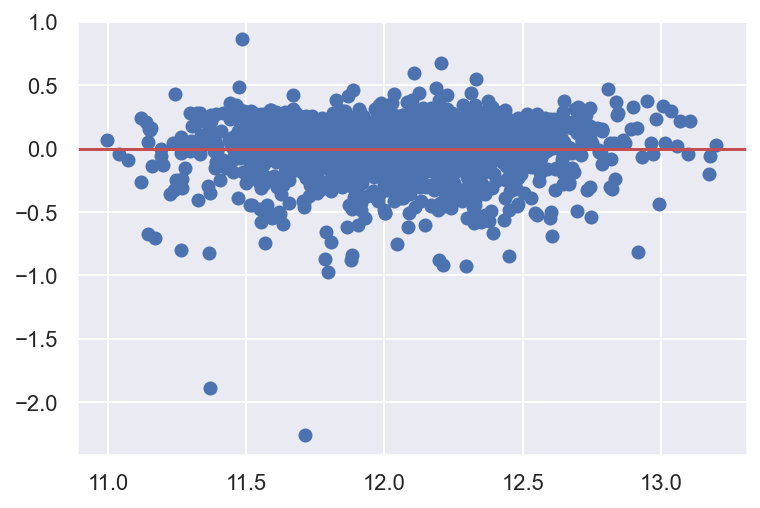

In [184]:
# Objective: residual vs fitted value scatter plot
# Reference for axhline: https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib
plt.plot(y_pred_train_loaded_lr, y_residuals_training_set, ls='',marker='o') # x,y : fitted values, residuals
plt.axhline(y=0, color='r', linestyle='-') 
plt.show()

(array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,
          8.,   8.,  19.,  53.,  95., 193., 454., 634., 416., 139.,  19.,
          2.,   1.,   1.]),
 array([-2.25792832, -2.13317686, -2.00842539, -1.88367393, -1.75892247,
        -1.63417101, -1.50941955, -1.38466808, -1.25991662, -1.13516516,
        -1.0104137 , -0.88566223, -0.76091077, -0.63615931, -0.51140785,
        -0.38665638, -0.26190492, -0.13715346, -0.012402  ,  0.11234947,
         0.23710093,  0.36185239,  0.48660385,  0.61135532,  0.73610678,
         0.86085824]),
 <BarContainer object of 25 artists>)

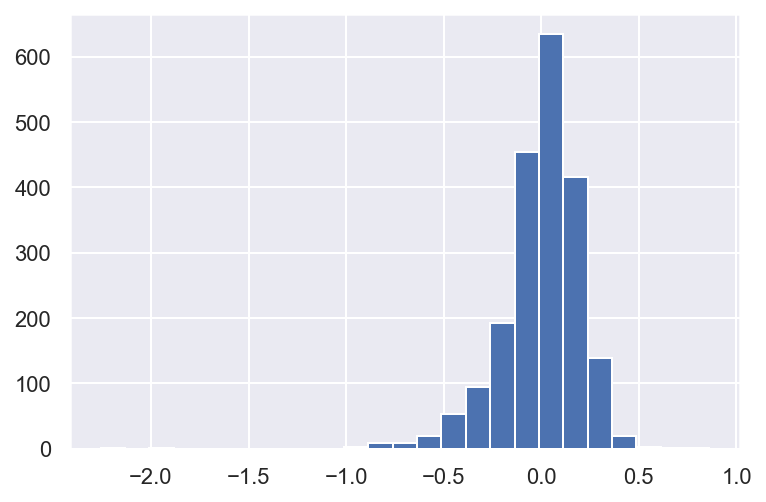

In [185]:
# We can also try plotting a histogram of our residuals
# For more on histograms, please refer to the EDA course (#1 in the series to achieve the IBM ML Certificate)
plt.hist(y_residuals_training_set, bins=25)

#### Calculate the mean of the residuals 

In [186]:
# We can also check the mean of the residuals
np.mean(y_residuals_training_set) #it's very close to zero

-1.1107653905385054e-16

It's worth revisiting the EDA phase and further exploring other topics like the correlation between the residuals and the independent variables. These topics are discussed in the report.